## Алгоритмы анализа данных

# Курсовой проект

**Подключение библиотек и скриптов**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.4)

%matplotlib inline

## Загрузка и обзор данных для обучения

**Описание датасета**

* **age** - возраст репетитора
* **years_of_experience** - опыт работы в годах
* **lesson_price** - цена за урок
* **qualification** - показатель квалификации
* **physics** - преподает ли репетитор также физику (1 - да, 0 - нет)
* **chemistry** - преподает ли репетитор также химию (1 - да, 0 - нет)
* **biology** - преподает ли репетитор также биологию (1 - да, 0 - нет)
* **english** - преподает ли репетитор также английский язык (1 - да, 0 - нет)
* **geography** - преподает ли репетитор также географию (1 - да, 0 - нет)
* **history** - преподает ли репетитор также историю (1 - да, 0 - нет)
* **mean_exam_points** - средний балл на экзамене по математике (целевая переменная).

In [2]:
df_train = pd.read_csv('train.csv', index_col='Id')
df_train.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
Id,,,,,,,,,,,
0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [3]:
df_train.shape

(10000, 11)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
dtypes: float64(11)
memory usage: 937.5 KB


In [5]:
df_train.describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,64.340800
std,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,13.536823
min,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


### Анализ и описание данных

**Корреляция признакового пространства с целевой переменной**

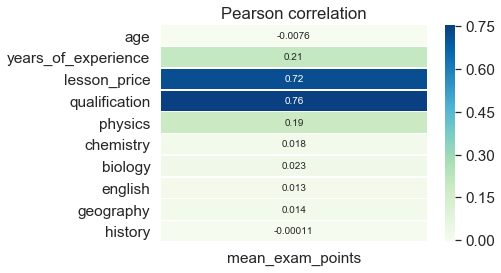

In [6]:
sns.heatmap(df_train.corr()[['mean_exam_points']][:-1], annot=True, linewidths=.5, cmap='GnBu')

plt.title('Pearson correlation')
plt.show()

**Гистограммы признаков**

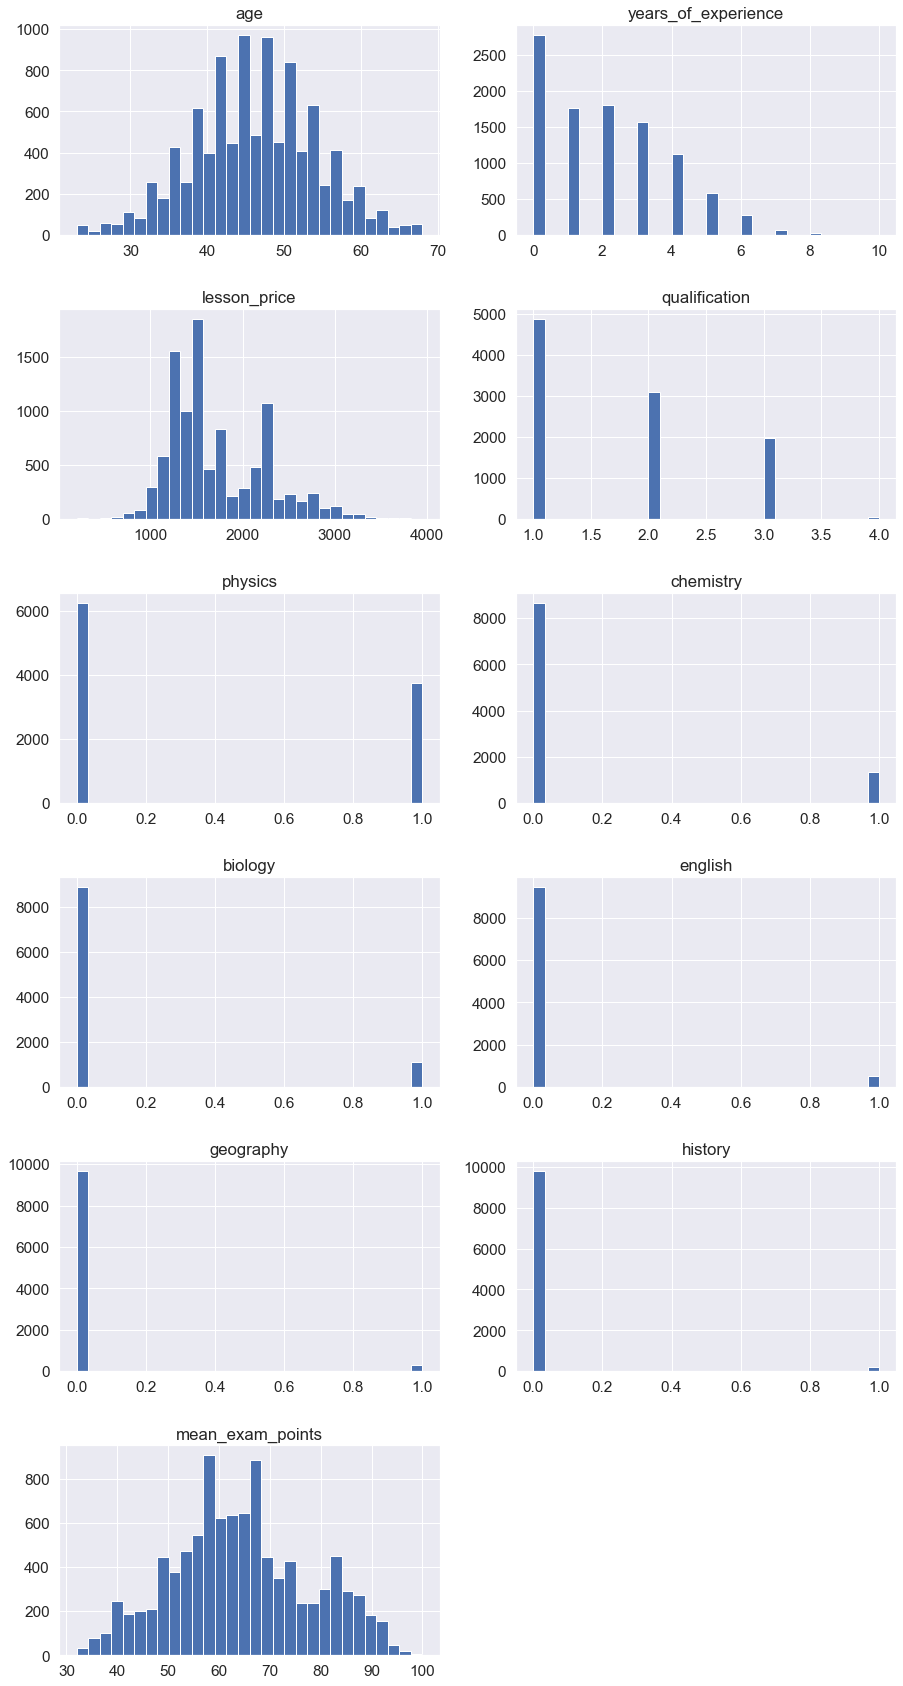

In [7]:
plt.figure(figsize=(15, 30))

for i, feature in enumerate(df_train.columns):
    plt.subplot(6, 2, i+1)
    plt.title(feature)
    df_train[feature].hist(bins=30)

plt.subplots_adjust(hspace=0.35)
plt.show()

**Диаграммы зависимостей признакового пространства от целевой переменной**

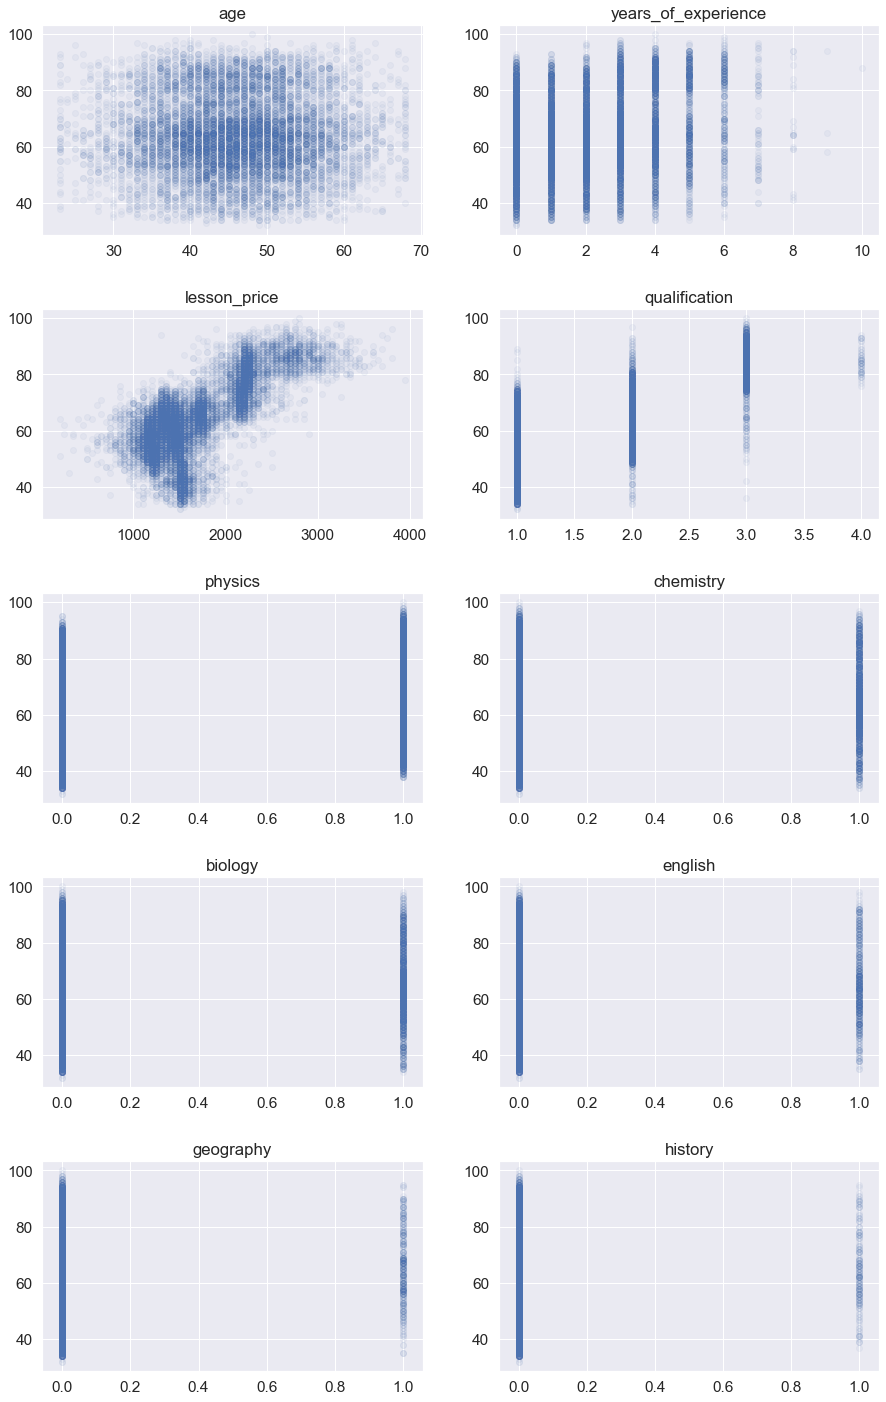

In [8]:
plt.figure(figsize=(15, 30))

for i, feature in enumerate(df_train.columns[:-1]):
    plt.subplot(6, 2, i+1)
    plt.title(feature)
    plt.scatter(df_train[feature], df_train['mean_exam_points'], alpha=0.05)

plt.subplots_adjust(hspace=0.35)
plt.show()

**Выводы**
 - Корреляция с целевой переменной высокая по модулю только у признаков *years_of_experience*, *lesson_price*, *qualification*, *physics*, крайне низкая и даже отрицательная у *age* и *history*. На диаграммах положительная коррелляция у *years_of_experience*, *lesson_price*, *qualification*, *physics* просматривается достаточно отчетливо.
 - Гистограмма признака *age* показывает, что это, судя по всему, сумма двух близких к нормальному распределений с одинаковым матожиданием. Диаграмма его зависимости от целевой переменной не показывает его связи с ней - даже какой-либо нелинейной или немонотонной. Его можно исключить.
 - По гистограммам у признаков *chemistry*, *biology*, *english*, *geography*, *history* как у предметов, преподающихся репетитором совместно с математикой, видно очень низкое количество срабатываний - в отличие от *physics*. что вполне логично и закономерно. Кроме того, их корреляция близка к нулю, что подтверждается и диаграммами. Их также можно исключать.

### Разбиение на train и valid

In [9]:
X = df_train.drop(columns=['mean_exam_points']).values
y = df_train['mean_exam_points'].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=21)

## Функции для реализации и проверки модели

**Коэффициент детерминации**

In [10]:
def r2_score(y, y_pred):
    y_mean = np.mean(y)
    r2 = 1. - np.sum((y_pred - y) ** 2)/np.sum((y - y_mean) ** 2)
    return r2

**Решающее дерево**

In [11]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [12]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, target):
        self.data = data
        self.target = target
        self.prediction = self.predict()
        
    def predict(self):
        prediction = np.mean(self.target)
        return prediction

In [13]:
# Расчет дисперсии

def variance(target):
    if len(target) <= 30:
        return np.var(target, ddof=1)
    return np.var(target)

In [14]:
# Разбиение датасета в узле

def split(data, target, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_target = target[left]
    false_target = target[right]
        
    return true_data, false_data, true_target, false_target

In [15]:
# Нахождение наилучшего разбиения

def find_best_split(data, target):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5
    
    current_variance = variance(target)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        t_values = [row[index] for row in data]
        
        for t in t_values:
            true_data, false_data, true_target, false_target = split(data, target, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = current_variance - variance(true_target)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [16]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, target, max_depth=None, n_splits=0):

    quality, t, index = find_best_split(data, target)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, target)
   
    #  Ограничение на глубину
    if max_depth:
        if n_splits == max_depth:
            return Leaf(data, target)
        n_splits += 1        
            
    true_data, false_data, true_target, false_target = split(data, target, index, t)

    # Рекурсивно строим два поддерева,
    # передавая обновляемые параметры
    true_branch = build_tree(true_data, true_target, max_depth, n_splits)
    false_branch = build_tree(false_data, false_target, max_depth, n_splits)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [17]:
def predict_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return predict_object(obj, node.true_branch)
    else:
        return predict_object(obj, node.false_branch)

In [18]:
def predict(data, tree):
    
    predictions = []
    for obj in data:
        prediction = predict_object(obj, tree)
        predictions.append(prediction)
    return predictions

**Случайный лес**

In [19]:
def get_bootstrap(data, labels, N=10, random_state=21):
    np.random.seed(random_state)
    n_samples = data.shape[0]
    bootstrap = []
    oob_samples = []
    
    for i in range(N):
        b_data = np.zeros(data.shape)
        b_labels = np.zeros(labels.shape)
        used_indexes = []
        
        for j in range(n_samples):
            sample_index = np.random.randint(0, n_samples-1)
            b_data[j] = data[sample_index]
            b_labels[j] = labels[sample_index]
            if not sample_index in used_indexes:
                used_indexes.append(sample_index)
        bootstrap.append((b_data, b_labels))
        
        oob_data = np.delete(data, used_indexes, 0)
        oob_target = np.delete(labels, used_indexes, 0)
        oob_samples.append((oob_data, oob_target))
        
    return bootstrap, oob_samples

In [20]:
def get_subsample(len_sample):
    # будем сохранять не сами признаки, а их индексы
    sample_indexes = [i for i in range(len_sample)]
    
    len_subsample = int(np.sqrt(len_sample))
    subsample = []
    
    random.shuffle(sample_indexes)
    for _ in range(len_subsample):
        subsample.append(sample_indexes.pop())
        
    return subsample

In [21]:
# предсказание голосованием деревьев

def tree_vote(forest, data):

    # добавим предсказания всех деревьев в список
    predictions = []
    for tree in forest:
        predictions.append(predict(data, tree))
      
    return np.mean(predictions, axis=0)

In [22]:
def random_forest(data, target, n_trees, max_depth=None, oob_score=False):
    forest = []
    bootstrap, oob_samples = get_bootstrap(data, target, n_trees)
    
    for b_data, b_target in bootstrap:
        forest.append(build_tree(b_data, b_target, max_depth=max_depth))
        
    if oob_score:
        oob_scores = []
        for oob_sample, tree in zip(oob_samples, forest):
            oob_data, oob_target = oob_sample
            oob_pred = predict(oob_data, tree)
            oob_score = r2_score(oob_target, oob_pred)
            oob_scores.append(oob_score)
        return forest, oob_scores
        
    return forest

## Обучение и проверка модели

**Обучаем лес из 10 деревьев.**

Отбор признаков показал, что лучшее качество достигается только с данными по *years_of_experience*, *lesson_price*, *qualification*, *physics* (соответственно 1-й, 2-й, 3-й и 4-й признаки) - как и предполагалось на описательном анализе.

In [23]:
n_trees = 10

forest, oob_scores = random_forest(X_train[:, 1:5], y_train, n_trees, oob_score=True)

Коэффициенты детерминации на Out-of-Bag выборках:

OOB R2:
 - mean: 0.7400106045819688
 - std: 0.013124998756243973


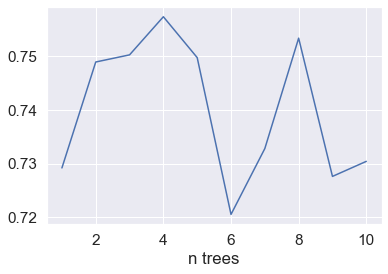

In [24]:
plt.plot(np.arange(1, n_trees+1), oob_scores)
plt.xlabel('n trees')

print(f'OOB R2:\n - mean: {np.mean(oob_scores)}\n - std: {np.std(oob_scores, ddof=1)}')

Значения достаточно высокие и не опускаются ниже 0.72.

**Коэффициент детерминации на валидационной выборке:**

In [25]:
valid_pred = tree_vote(forest, X_valid[:, 1:5])

r2_score(y_valid, valid_pred)

0.7741108759667747

## Получение ответа на тестовых данных

In [26]:
df_test = pd.read_csv('test.csv', index_col='Id')
df_test.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
Id,,,,,,,,,,
10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


Ставним статистики тестового и обучающего датасета:

In [27]:
df_test.describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000
mean,45.97280,1.980000,1697.095000,1.709400,0.38130,0.123500,0.120100,0.056000,0.031400,0.0184
std,7.95628,1.783289,524.262621,0.793483,0.48573,0.329027,0.325095,0.229933,0.174405,0.1344
min,23.00000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,41.00000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
50%,46.00000,2.000000,1500.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
75%,51.00000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0000
max,68.00000,10.000000,4050.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.0000


In [28]:
df_train.drop(columns=['mean_exam_points']).describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400
std,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933
min,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Получим предсказание обученной модели на тестовых данных (при этом отберем нужные признаки):**

In [29]:
X_test = df_test.iloc[:, 1:5].values

test_pred = tree_vote(forest, X_test)

Сравним статистики исходного и предсказанного целевого признака:

In [30]:
pd.Series(y).describe()

count    10000.000000
mean        64.340800
std         13.536823
min         32.000000
25%         55.000000
50%         63.000000
75%         73.000000
max        100.000000
dtype: float64

In [31]:
pd.Series(test_pred).describe()

count    10000.000000
mean        64.346272
std         11.844310
min         40.288121
25%         55.378702
50%         60.445215
75%         71.511814
max         90.529006
dtype: float64

Статистики датасетов получились относительно близкими.

**Запишем предсказание в файл:**

In [32]:
submission = pd.read_csv('submission_example.csv', index_col='Id')
submission.iloc[:, 0] = test_pred

submission.to_csv('NovikovVN_submission.csv')

На [соревновании](https://www.kaggle.com/c/tutors-expected-math-exam-results/leaderboard#score) отправленный файл показал коэффициент детерминации **0.77377** (ник - VictorNovikov).